# Goal 1: Measure the Noise between the Noisy and Ground Truth Images Using the SSIM and PSNR Metrics

*  SSIM > 0.9: Excellent similarity. The reconstructed/filtered image closely resembles the original image.
*  0.7 < SSIM < 0.9: Good similarity. The reconstructed/filtered image has some minor differences but still maintains a high level of similarity to the original image.
*  0.5 < SSIM < 0.7: Moderate similarity. The reconstructed/filtered image has noticeable differences but still retains some level of similarity to the original image.
*  SSIM < 0.5: Poor similarity. The reconstructed/filtered image has significant differences and may not be visually similar to the original image. differences.

*   ############################################################

*   PSNR > 40 dB: Excellent quality. The reconstructed/filtered image closely resembles the original image.
*   30 dB < PSNR < 40 dB: Good quality. The reconstructed/filtered image has some minor imperfections but is still visually similar to the original image.
*    20 dB < PSNR < 30 dB: Moderate quality. The reconstructed/filtered image has noticeable distortions or noise but is still recognizable.
*    PSNR < 20 dB: Poor quality. The reconstructed/filtered image has significant distortions or noise and may differ significantly from the original image.

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

ground_markers_1 = 'SIDD_image_files_full_resolution/0035_GT_SRGB_010.PNG'
ground_markers_2 = 'SIDD_image_files_full_resolution/0035_GT_SRGB_011.PNG'
noisy_markers_1 = 'SIDD_image_files_full_resolution/0035_NOISY_SRGB_010.PNG'
noisy_markers_2 = 'SIDD_image_files_full_resolution/0035_NOISY_SRGB_011.PNG'

ground_peppers_1 = 'SIDD_image_files_full_resolution/0102_GT_SRGB_010.PNG'
ground_peppers_2 = 'SIDD_image_files_full_resolution/0102_GT_SRGB_011.PNG'
noisy_peppers_1 = 'SIDD_image_files_full_resolution/0102_NOISY_SRGB_010.PNG'
noisy_peppers_2 = 'SIDD_image_files_full_resolution/0102_NOISY_SRGB_011.PNG'

image_list = [ground_markers_1, ground_markers_2, noisy_markers_1, noisy_markers_2, ground_peppers_1, ground_peppers_2, noisy_peppers_1, noisy_peppers_2]

ground_image_list = [ground_markers_1, ground_markers_2, ground_peppers_1, ground_peppers_2]
noisy_image_list = [noisy_markers_1, noisy_markers_2, noisy_peppers_1, noisy_peppers_2]

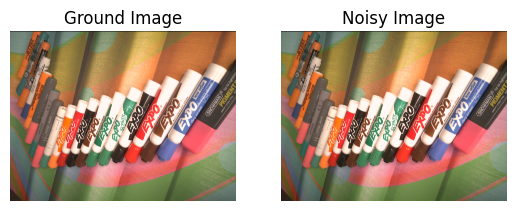

SSIM: 0.7381134606383734



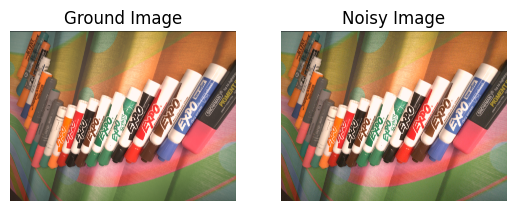

SSIM: 0.7382935925411256



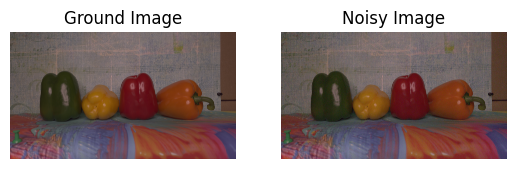

SSIM: 0.5246222882610855



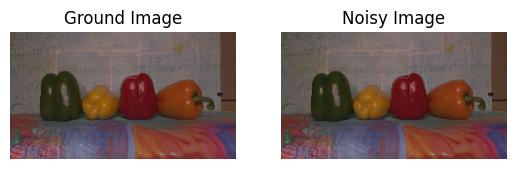

SSIM: 0.5249651638960459

Average SSIM Score: 0.6315


In [8]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Create an empty list to store the SSIM scores
ssim_scores = []

for ground_image_path, noisy_image_path in zip(ground_image_list, noisy_image_list):
    ground_image = Image.open(ground_image_path)
    noisy_image = Image.open(noisy_image_path)

    plt.subplot(1, 2, 1)
    plt.imshow(ground_image)
    plt.title('Ground Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image)
    plt.title('Noisy Image')
    plt.axis('off')

    plt.show()

    # Convert to grayscale and NumPy arrays
    ground_image = np.array(ground_image.convert('L'))
    noisy_image = np.array(noisy_image.convert('L'))

    # Calculate SSIM
    ssim_score = ssim(ground_image, noisy_image)
    print(f"SSIM: {ssim_score}\n")

     # Append the SSIM score to the list
    ssim_scores.append(ssim_score)

# Calculate the average SSIM score
average_ssim = np.mean(ssim_scores)
print(f"Average SSIM Score: {average_ssim:.4f}")

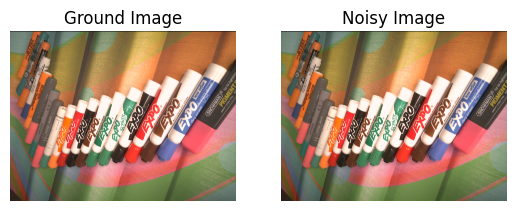

PSNR: 28.11544065482302



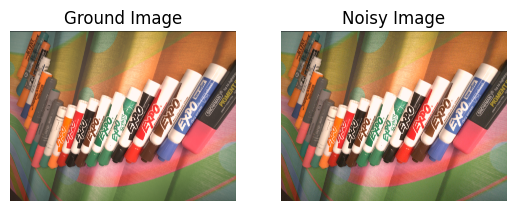

PSNR: 28.11858531127725



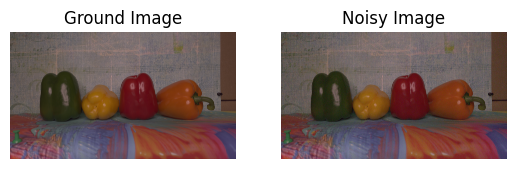

PSNR: 25.845194551863987



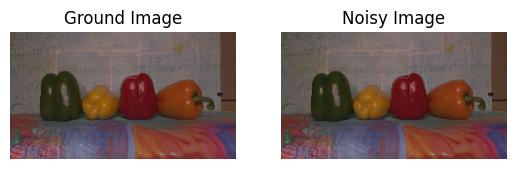

PSNR: 25.847111043274825

Average PSNR Score: 26.9816


In [9]:
from skimage.metrics import peak_signal_noise_ratio as psnr

# Create an empty list to store the PSNR scores
psnr_scores = []

for ground_image_path, noisy_image_path in zip(ground_image_list, noisy_image_list):
    ground_image = Image.open(ground_image_path)
    noisy_image = Image.open(noisy_image_path)

    plt.subplot(1, 2, 1)
    plt.imshow(ground_image)
    plt.title('Ground Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image)
    plt.title('Noisy Image')
    plt.axis('off')

    plt.show()

    # Convert to NumPy arrays
    ground_image = np.array(ground_image)
    noisy_image = np.array(noisy_image)

    # Calculate PSNR
    psnr_score = psnr(ground_image, noisy_image)
    print(f"PSNR: {psnr_score}\n")

    # Append the PSNR score to the list
    psnr_scores.append(psnr_score)

# Calculate the average PSNR score
average_psnr = np.mean(psnr_scores)
print(f"Average PSNR Score: {average_psnr:.4f}")

# Goal 2: Take the Noisy Images and Apply a Gaussian Filter to “Clean Up” the Images

*   Explore parameters to get the “cleanest” images (don't spend too much time).
*   Measure how long it takes to apply the gaussian filter to an image.



C:\Users\anish\AppData\Local\Temp\ipykernel_39432\2821509739.py:26: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_image = gaussian(normalized_image_arr, sigma=sigma, truncate=truncate, multichannel=True)


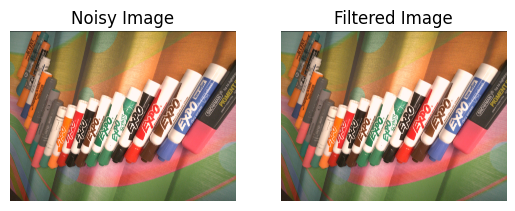

Execution Time: 1.1022 seconds



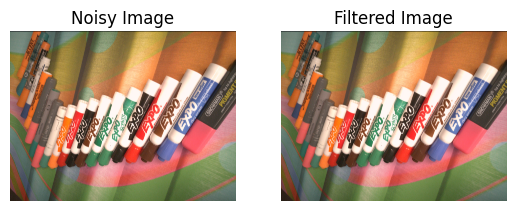

Execution Time: 1.4751 seconds



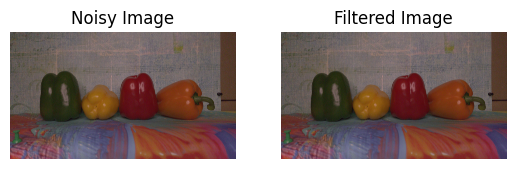

Execution Time: 1.6688 seconds



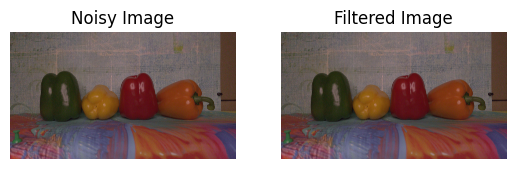

Execution Time: 1.7670 seconds

Average Execution Time: 1.5033 seconds



In [10]:
from skimage.filters import gaussian
import time

noisy_image_list = [noisy_markers_1, noisy_markers_2, noisy_peppers_1, noisy_peppers_2]

# Define the parameters for the Gaussian filter --> These parameters can be edited to improve SSIM and PSNR scores.
sigma = 1.5 # Standard deviation of the Gaussian kernel
truncate = 2.0 # Truncation of the Gaussian kernel

# List to store the filtered images
filtered_image_list = []

# List to store the execution times
executionTimes = []

# Apply Gaussian filter to each noisy image
for noisy_image_path in noisy_image_list:
    noisy_image = Image.open(noisy_image_path)
    noisy_image_arr = np.array(noisy_image)

    # Normalize the pixel values to the range of 0 to 1
    normalized_image_arr = noisy_image_arr.astype(np.float32) / 255.0

    # Apply the Gaussian filter
    start_time = time.time()
    filtered_image = gaussian(normalized_image_arr, sigma=sigma, truncate=truncate, multichannel=True)
    end_time = time.time()

    # Scale the pixel values back to the range of 0 to 255
    filtered_image_scaled = (filtered_image * 255.0).clip(0, 255).astype(np.uint8)

    # Convert the filtered image array back to PIL Image
    filtered_image_pil = Image.fromarray(filtered_image_scaled)

    # Add the filtered image to the list
    filtered_image_list.append(filtered_image_pil)

    # Display the original noisy image and the filtered image
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image)
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image_pil)
    plt.title('Filtered Image')
    plt.axis('off')

    plt.show()

    # Calculate the execution time
    execution_time = end_time - start_time
    print(f"Execution Time: {execution_time:.4f} seconds\n")

    # Append the execution time to the list
    executionTimes.append(execution_time)

# Calculate the average execution time scores
average_execution_time = np.mean(executionTimes)
print(f"Average Execution Time: {average_execution_time:.4f} seconds\n")

# Goal 3: Compare the Filtered Images Quantitatively (SSIM, PSNR) to the Ground Truth Images

*  SSIM > 0.9: Excellent similarity. The reconstructed/filtered image closely resembles the original image.
*  0.7 < SSIM < 0.9: Good similarity. The reconstructed/filtered image has some minor differences but still maintains a high level of similarity to the original image.
*  0.5 < SSIM < 0.7: Moderate similarity. The reconstructed/filtered image has noticeable differences but still retains some level of similarity to the original image.
*  SSIM < 0.5: Poor similarity. The reconstructed/filtered image has significant differences and may not be visually similar to the original image. differences.

*   ############################################################

*   PSNR > 40 dB: Excellent quality. The reconstructed/filtered image closely resembles the original image.
*   30 dB < PSNR < 40 dB: Good quality. The reconstructed/filtered image has some minor imperfections but is still visually similar to the original image.
*    20 dB < PSNR < 30 dB: Moderate quality. The reconstructed/filtered image has noticeable distortions or noise but is still recognizable.
*    PSNR < 20 dB: Poor quality. The reconstructed/filtered image has significant distortions or noise and may differ significantly from the original image.


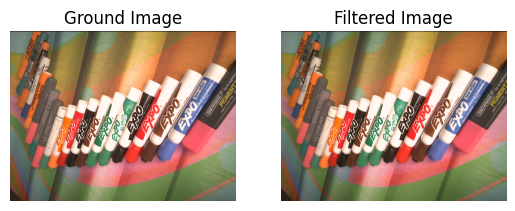

SSIM Score: 0.9485



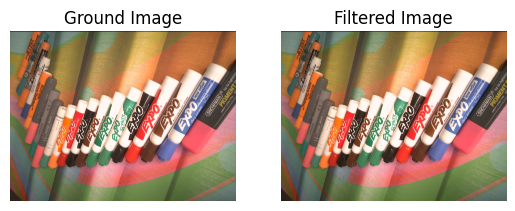

SSIM Score: 0.9482



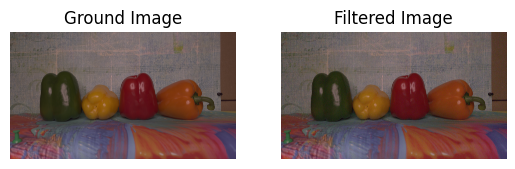

SSIM Score: 0.9370



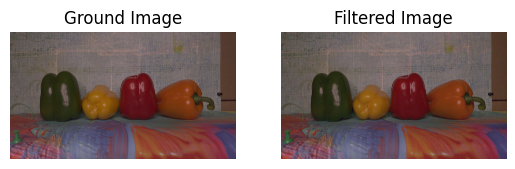

SSIM Score: 0.9366

Average SSIM Score: 0.9426


In [11]:
# Create an empty list to store the SSIM scores
ssim_scores = []

for ground_image_path, filtered_image in zip(ground_image_list, filtered_image_list):
    ground_image = Image.open(ground_image_path)
    filtered_image_obj = filtered_image

    ground_image_gray = ground_image.convert('L')
    filtered_image_gray = filtered_image_obj.convert('L')

    plt.subplot(1, 2, 1)
    plt.imshow(ground_image)
    plt.title('Ground Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image_obj)
    plt.title('Filtered Image')
    plt.axis('off')

    plt.show()

    # Convert to NumPy arrays
    ground_image_np = np.array(ground_image_gray)
    filtered_image_np = np.array(filtered_image_gray)

    # Calculate SSIM
    ssim_score = ssim(ground_image_np, filtered_image_np)
    print(f"SSIM Score: {ssim_score:.4f}\n")

    # Append the SSIM score to the list
    ssim_scores.append(ssim_score)

# Calculate the average SSIM score
average_ssim = np.mean(ssim_scores)
print(f"Average SSIM Score: {average_ssim:.4f}")

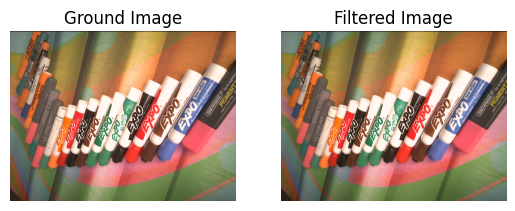

PSNR Score: 33.7588



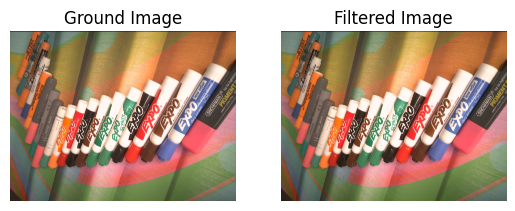

PSNR Score: 33.7583



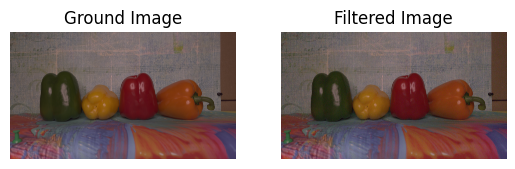

PSNR Score: 32.7774



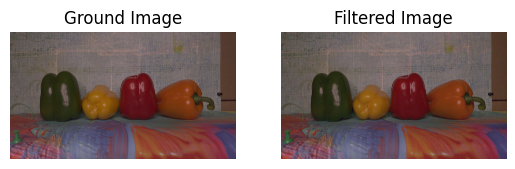

PSNR Score: 32.7718

Average PSNR Score: 33.2666


In [12]:
# Create an empty list to store the PSNR scores
psnr_scores = []

for ground_image, filtered_image in zip(ground_image_list, filtered_image_list):
    ground_image = Image.open(ground_image)
    filtered_image = filtered_image

    plt.subplot(1, 2, 1)
    plt.imshow(ground_image)
    plt.title('Ground Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title('Filtered Image')
    plt.axis('off')

    plt.show()

    # Convert to NumPy arrays
    ground_image = np.array(ground_image)
    filtered_image = np.array(filtered_image)

    # Calculate PSNR
    psnr_score = psnr(ground_image, filtered_image)
    print(f"PSNR Score: {psnr_score:.4f}\n")

     # Append the PSNR score to the list
    psnr_scores.append(psnr_score)

# Calculate the average PSNR score
average_psnr = np.mean(psnr_scores)
print(f"Average PSNR Score: {average_psnr:.4f}")

# Extra: Cropped Image Pairs of the Following Size -->

*   480p --> (854, 480)
*   720p --> (1280, 720)
*   1080p --> (1920, 1080)
*   4K (If Possible) --> (3840, 2160)

We can use the cropped samples to infer what kind of process to expect with videos of said quality. Make sure we measure the time it takes to clean these crops with the gaussian filter.

**To Implement Just Move the Code Snippets to the Desired Location.**

In [13]:
from PIL import Image

# Define the target resolution
target_resolution = (854, 480)

# Resize image list
resized_image_list = []
for image_path in image_list:
    image = Image.open(image_path)
    resized_image = image.resize(target_resolution, Image.ANTIALIAS)
    resized_image_list.append(resized_image)

# Resize ground image list
resized_ground_image_list = []
for image_path in ground_image_list:
    image = Image.open(image_path)
    resized_image = image.resize(target_resolution, Image.ANTIALIAS)
    resized_ground_image_list.append(resized_image)

# Resize noisy image list
resized_noisy_image_list = []
for image_path in noisy_image_list:
    image = Image.open(image_path)
    resized_image = image.resize(target_resolution, Image.ANTIALIAS)
    resized_noisy_image_list.append(resized_image)

# Resize filtered image list
resized_filtered_image_list = []
for image in filtered_image_list:
    resized_image = image.resize(target_resolution, Image.ANTIALIAS)
    resized_filtered_image_list.append(resized_image)

C:\Users\anish\AppData\Local\Temp\ipykernel_39432\1810977523.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(target_resolution, Image.ANTIALIAS)
C:\Users\anish\AppData\Local\Temp\ipykernel_39432\1810977523.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(target_resolution, Image.ANTIALIAS)
C:\Users\anish\AppData\Local\Temp\ipykernel_39432\1810977523.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(target_resolution, Image.ANTIALIAS)
C:\Users\anish\AppData\Local\Temp\ipykernel_39432\1810977523.py:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(targ

In [14]:
# Verify Results
print(resized_image_list[0].size)
print(resized_ground_image_list[0].size)
print(resized_noisy_image_list[0].size)
print(resized_filtered_image_list[0].size)

(854, 480)
(854, 480)
(854, 480)
(854, 480)
